# Top post in SubReddit: "Ask me Anything"

## Abstract
The assignment is based on Subreddit r/IAmA. The IAmA (as in I am a ______, Ask me Anything) is a platform on Reddit where a new form of crowdsourced interview happens.

The interviewee begins the process by starting a post, describing who they are and what they do. Then commenters from across the internet leave questions and can vote on other questions according to which they would like to see answered. The interviewee can go through and reply to the questions they find interesting, and easily see those questions the internet is dying to have the answer too. Our assignment includes merging database from three different sources of this subreddit(raw csv, API, web scrapping) followed by munging and cleaning data. Furthermore, we evaluate the data and visualize some of the attributes(upvotes, downvotes, score etc.) We developed a database using the extracted source data and display it in the form of an Entity-Relationship Diagram.

### Importing the dataset using API
Note: Praw is a Python “wrapper,” which is like an add-on package that simplifies sets of API calls into easy-to-use functions for users.

In [1]:
#importing libraries
import praw 
import pandas as pd
reddit = praw.Reddit(client_id='tZ9VfNguNJ0KIw',
                     client_secret='jxlR2N-uggte5dJHPx_iCCGriM8',
                     password='900490231In',
                     user_agent='reddit_worldnews',
                     username='kneekitaaa')

In [2]:
subreddit = reddit.subreddit('iama')
# print(subreddit)
print(list(subreddit.top()))
# print(subreddit.display_name)  # Output: iama
# print(subreddit.title)         # Output:I Am A, where the mundane...
# print(subreddit.description)

[Submission(id='z1c9z'), Submission(id='7eojwf'), Submission(id='3c0iw2'), Submission(id='7jtes4'), Submission(id='57dw9a'), Submission(id='aunv58'), Submission(id='80ow6w'), Submission(id='5fjszg'), Submission(id='5whpqs'), Submission(id='9tm9oo'), Submission(id='6qwjro'), Submission(id='6zoy5o'), Submission(id='drk4qc'), Submission(id='74nyxw'), Submission(id='2wwdep'), Submission(id='6ka4pd'), Submission(id='36j690'), Submission(id='anu4u9'), Submission(id='334wcy'), Submission(id='99z6z7'), Submission(id='6zvwqe'), Submission(id='ej5wwp'), Submission(id='5h7gq8'), Submission(id='djpf40'), Submission(id='6uaklk'), Submission(id='3gixri'), Submission(id='atkycd'), Submission(id='au2rjb'), Submission(id='c8ru2y'), Submission(id='7xroc8'), Submission(id='2rgsan'), Submission(id='6a7nyr'), Submission(id='6mvhn3'), Submission(id='dm10gh'), Submission(id='dlk00e'), Submission(id='azwb59'), Submission(id='7l3e02'), Submission(id='dfesr9'), Submission(id='5vkoyd'), Submission(id='chw6cf'), 

In [3]:
#iterating through the 10 submissions marked hot
for submission in subreddit.hot(limit=10):
    print(submission.title)  # Output: the submission's title
    print(submission.score)  # Output: the submission's upvotes
    print(submission.id)     # Output: the submission's ID
    print(submission.url)    # Output: the URL
    
#print(" \n\nhello\n",submission, " \n\nhello")

I am a research professor who detects, isolates and performs genetic analysis of respiratory viruses, including coronaviruses and animal and human influenza viruses, as well as arboviruses. AMA!
1592
ew6jfh
https://www.reddit.com/r/IAmA/comments/ew6jfh/i_am_a_research_professor_who_detects_isolates/
I’m Dorothy Hatsukami, Ph.D., a professor of psychiatry and a cancer researcher. I’ve conducted studies on tobacco addiction and its treatment for over 30 years. Recently, I worked with NPR’s Life Kit podcast on an episode about how to break the smoking habit — Ask me anything!
4400
evr0ec
https://www.reddit.com/r/IAmA/comments/evr0ec/im_dorothy_hatsukami_phd_a_professor_of/
I hiked the Great Himalaya Trail for 154 days across the highest trails of Nepal. Ask me anything!
651
evqpvr
https://www.reddit.com/r/IAmA/comments/evqpvr/i_hiked_the_great_himalaya_trail_for_154_days/
I am 83 years old. I was periodically homeless on the streets of San Fransisco from age 7-18. I wrote a book based on 

### Downloading the top 1000 articles of all time on Subreddit_IAmA

The code below printed out a note for every 5 submissions the for loop iterates through. Once it was finished, we exported the  data into a Pandas DataFrame for wrangling and analysis.

In [4]:
time = []
score = []
domain = []
ama_title = []
redditorid = []
upvotes = []
downvotes = []
num_comments = []

i=0
for submission in subreddit.top(limit=1000):
    i+=1
    time.append(submission.created_utc)
    score.append(submission.score)
    domain.append(submission.domain)
    ama_title.append(submission.title)
    redditorid.append(submission.id)
    upvotes.append(submission.ups)
    downvotes.append(submission.downs)
    num_comments.append(submission.num_comments)
    
    if i%5 == 0:
        print(f'{i} submissions completed')

5 submissions completed
10 submissions completed
15 submissions completed
20 submissions completed
25 submissions completed
30 submissions completed
35 submissions completed
40 submissions completed
45 submissions completed
50 submissions completed
55 submissions completed
60 submissions completed
65 submissions completed
70 submissions completed
75 submissions completed
80 submissions completed
85 submissions completed
90 submissions completed
95 submissions completed
100 submissions completed
105 submissions completed
110 submissions completed
115 submissions completed
120 submissions completed
125 submissions completed
130 submissions completed
135 submissions completed
140 submissions completed
145 submissions completed
150 submissions completed
155 submissions completed
160 submissions completed
165 submissions completed
170 submissions completed
175 submissions completed
180 submissions completed
185 submissions completed
190 submissions completed
195 submissions completed
200 su

### Cleaning and auditing the data

In [5]:
"""
time = []
score = []
domain = []
ama_title = []
redditorid = []
title = []
upvotes = []
downvotes = []
num_comments = []
"""
ama_df = pd.DataFrame(
    {
     'created_utc': time,
     'score':score,
     'domain':domain,
     'id': redditorid,
     'title':ama_title,
     'ups': upvotes,
     'downs': downvotes,
     'num_comments': num_comments,
     
    })
ama_df.head(10)

,created_utc,score,domain,id,title,ups,downs,num_comments
0,1.346270e+09,216142,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",216142,0,23135
1,1.511329e+09,201649,battleforthenet.com,7eojwf,Protect Net Neutrality. Save the Internet.,201649,0,2743
2,1.435945e+09,126769,self.IAmA,3c0iw2,"[AMA Request] Victoria, ex-AMA mod",126769,0,2814
3,1.513275e+09,121802,self.IAmA,7jtes4,FCC just voted to kill Net Neutrality. Now we ...,121802,0,2645
4,1.476408e+09,116912,self.IAmA,57dw9a,"I’m American citizen, undecided voter, loving ...",116912,0,16891
5,1.551116e+09,110071,self.IAmA,aunv58,"I’m Bill Gates, co-chair of the Bill & Melinda...",110071,0,19548
6,1.519757e+09,105333,self.IAmA,80ow6w,"I’m Bill Gates, co-chair of the Bill & Melinda...",105333,0,19341
7,1.480439e+09,97724,self.IAmA,5fjszg,"I am Leah Remini, Ask Me Anything about Scient...",97724,0,17836
8,1.488213e+09,97541,self.IAmA,5whpqs,"I’m Bill Gates, co-chair of the Bill & Melinda...",97541,0,16545
9,1.541180e+09,96472,self.IAmA,9tm9oo,I am Senator Bernie Sanders. Ask Me Anything!,96472,0,15340


In [6]:
#checking if there are any null values in the data frame
ama_df.isnull().any()

created_utc     False
score           False
domain          False
id              False
title           False
ups             False
downs           False
num_comments    False
dtype: bool

In [7]:
primary = range(0,1000)
primary[0]

0

In [8]:
ama_df.head()

,created_utc,score,domain,id,title,ups,downs,num_comments
0,1.346270e+09,216142,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",216142,0,23135
1,1.511329e+09,201649,battleforthenet.com,7eojwf,Protect Net Neutrality. Save the Internet.,201649,0,2743
2,1.435945e+09,126769,self.IAmA,3c0iw2,"[AMA Request] Victoria, ex-AMA mod",126769,0,2814
3,1.513275e+09,121802,self.IAmA,7jtes4,FCC just voted to kill Net Neutrality. Now we ...,121802,0,2645
4,1.476408e+09,116912,self.IAmA,57dw9a,"I’m American citizen, undecided voter, loving ...",116912,0,16891


## Importing raw csv file
Data gathered is from the API mentioned below. 
Data consists of 
created_utc               
score                     
domain                  
id                        
title                     
ups                       
downs                    
num_comments              
permalink                 
selftext                  
link_flair_text       
over_18                  
thumbnail                 
subreddit_id              
edited                    
link_flair_css_class      
author_flair_css_class    
is_self                   
name                      
url                       
distinguished

In [9]:
df2 = pd.read_csv("C:/Users/paini/OneDrive/Desktop/dmdd/IAmA.csv")

In [10]:
df2.head()

,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,selftext,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.346270e+09,14749,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",240725,225976,24185,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,"Hi, I’m Barack Obama, President of the United ...",...,False,self,t5_2qzb6,1346276503.0,politics,obama,True,t3_z1c9z,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,NaN
1,1.360604e+09,8447,self.IAmA,18bhme,"I’m Bill Gates, co-chair of the Bill &amp; Mel...",149057,140610,28062,http://www.reddit.com/r/IAmA/comments/18bhme/i...,"Hi, I’m Bill Gates, co-chair of the Bill &amp;...",...,False,self,t5_2qzb6,1360612188.0,business,NaN,True,t3_18bhme,http://www.reddit.com/r/IAmA/comments/18bhme/i...,NaN
2,1.321204e+09,7041,self.IAmA,mateq,I am Neil deGrasse Tyson -- AMA,44700,37659,10850,http://www.reddit.com/r/IAmA/comments/mateq/i_...,For a few hours I will answer any question you...,...,False,self,t5_2qzb6,False,science,mozilla,True,t3_mateq,http://www.reddit.com/r/IAmA/comments/mateq/i_...,NaN
3,1.343426e+09,6866,self.IAmA,x9pq0,"IAM Bill Nye the Science Guy, AMA",71011,64145,11895,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,I'll start with the few questions sent in a fe...,...,False,self,t5_2qzb6,False,science,NaN,True,t3_x9pq0,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,NaN
4,1.365473e+09,6572,self.IAmA,1byn1l,"I was mauled by a bear, fought it off, and dro...",24536,17964,5337,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,"Hello, my name is Allena Hansen. In 2008 wh...",...,False,self,t5_2qzb6,1371360207.0,unique,NaN,True,t3_1byn1l,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,NaN


### Checking for null values

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
created_utc               1000 non-null float64
score                     1000 non-null int64
domain                    1000 non-null object
id                        1000 non-null object
title                     1000 non-null object
ups                       1000 non-null int64
downs                     1000 non-null int64
num_comments              1000 non-null int64
permalink                 1000 non-null object
selftext                  977 non-null object
link_flair_text           0 non-null float64
over_18                   1000 non-null bool
thumbnail                 1000 non-null object
subreddit_id              1000 non-null object
edited                    1000 non-null object
link_flair_css_class      982 non-null object
author_flair_css_class    72 non-null object
is_self                   1000 non-null bool
name                      1000 non-null object
url           

In [12]:
# checking missing, NaN data in the dataframe through CSV
df2.isnull().any()

created_utc               False
score                     False
domain                    False
id                        False
title                     False
ups                       False
downs                     False
num_comments              False
permalink                 False
selftext                   True
link_flair_text            True
over_18                   False
thumbnail                 False
subreddit_id              False
edited                    False
link_flair_css_class       True
author_flair_css_class     True
is_self                   False
name                      False
url                       False
distinguished              True
dtype: bool

### Checking the total null values in the column using sum() function

In [13]:
df2.isnull().sum()

created_utc                  0
score                        0
domain                       0
id                           0
title                        0
ups                          0
downs                        0
num_comments                 0
permalink                    0
selftext                    23
link_flair_text           1000
over_18                      0
thumbnail                    0
subreddit_id                 0
edited                       0
link_flair_css_class        18
author_flair_css_class     928
is_self                      0
name                         0
url                          0
distinguished              985
dtype: int64

### Displaying the columns having null values

In [14]:
df2['selftext']

0      Hi, I’m Barack Obama, President of the United ...
1      Hi, I’m Bill Gates, co-chair of the Bill &amp;...
2      For a few hours I will answer any question you...
3      I'll start with the few questions sent in a fe...
4         Hello, my name is Allena Hansen. In 2008 wh...
                             ...                        
995    I am Christine Ha.  I have an autoimmune condi...
996    WHO AM I? I am Gov. Gary Johnson, Honorary Cha...
997    - What is your position?  \n- How far up the c...
998    I broke my neck 5 years ago falling 18ft from ...
999    I'm a business owner and entrepreneur and I ha...
Name: selftext, Length: 1000, dtype: object

In [15]:
df2['link_flair_text']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: link_flair_text, Length: 1000, dtype: float64

In [16]:
df2['author_flair_css_class']

0        obama
1          NaN
2      mozilla
3          NaN
4          NaN
        ...   
995        NaN
996        NaN
997        NaN
998        NaN
999        NaN
Name: author_flair_css_class, Length: 1000, dtype: object

In [17]:
df2['distinguished']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
995    NaN
996    NaN
997    NaN
998    NaN
999    NaN
Name: distinguished, Length: 1000, dtype: object

In [18]:
df2['link_flair_css_class']

0      politics
1      business
2       science
3       science
4        unique
         ...   
995       other
996    politics
997     request
998         NaN
999    business
Name: link_flair_css_class, Length: 1000, dtype: object

### Checking the shape of data

In [19]:
df2.shape

(1000, 21)

### Checking the columns present in data

In [20]:
df2.columns

Index(['created_utc', 'score', 'domain', 'id', 'title', 'ups', 'downs',
       'num_comments', 'permalink', 'selftext', 'link_flair_text', 'over_18',
       'thumbnail', 'subreddit_id', 'edited', 'link_flair_css_class',
       'author_flair_css_class', 'is_self', 'name', 'url', 'distinguished'],
      dtype='object')

### Dropping the columns which are unnecessary

In [21]:
revised_df = df2.dropna(axis='columns')
revised_df

,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,over_18,thumbnail,subreddit_id,edited,is_self,name,url
0,1.346270e+09,14749,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",240725,225976,24185,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,False,self,t5_2qzb6,1346276503.0,True,t3_z1c9z,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...
1,1.360604e+09,8447,self.IAmA,18bhme,"I’m Bill Gates, co-chair of the Bill &amp; Mel...",149057,140610,28062,http://www.reddit.com/r/IAmA/comments/18bhme/i...,False,self,t5_2qzb6,1360612188.0,True,t3_18bhme,http://www.reddit.com/r/IAmA/comments/18bhme/i...
2,1.321204e+09,7041,self.IAmA,mateq,I am Neil deGrasse Tyson -- AMA,44700,37659,10850,http://www.reddit.com/r/IAmA/comments/mateq/i_...,False,self,t5_2qzb6,False,True,t3_mateq,http://www.reddit.com/r/IAmA/comments/mateq/i_...
3,1.343426e+09,6866,self.IAmA,x9pq0,"IAM Bill Nye the Science Guy, AMA",71011,64145,11895,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,False,self,t5_2qzb6,False,True,t3_x9pq0,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...
4,1.365473e+09,6572,self.IAmA,1byn1l,"I was mauled by a bear, fought it off, and dro...",24536,17964,5337,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,False,self,t5_2qzb6,1371360207.0,True,t3_1byn1l,http://www.reddit.com/r/IAmA/comments/1byn1l/i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.368063e+09,1462,self.IAmA,1dz11f,"I am Christine Ha, MasterChef Season 3 Winner....",2867,1405,494,http://www.reddit.com/r/IAmA/comments/1dz11f/i...,False,self,t5_2qzb6,1368063400.0,True,t3_1dz11f,http://www.reddit.com/r/IAmA/comments/1dz11f/i...
996,1.367366e+09,1461,self.IAmA,1dg3ak,"Reddit w/ Gov. Gary Johnson, Honorary Chairman...",5944,4483,2076,http://www.reddit.com/r/IAmA/comments/1dg3ak/r...,False,self,t5_2qzb6,False,True,t3_1dg3ak,http://www.reddit.com/r/IAmA/comments/1dg3ak/r...
997,1.346329e+09,1459,self.IAmA,z2nug,AMA Request - The White House staffer/Redditor...,12818,11359,926,http://www.reddit.com/r/IAmA/comments/z2nug/am...,False,self,t5_2qzb6,False,True,t3_z2nug,http://www.reddit.com/r/IAmA/comments/z2nug/am...
998,1.344095e+09,1460,self.IAmA,xo9bm,IAmA quadriplegic who games without the use of...,3440,1980,615,http://www.reddit.com/r/IAmA/comments/xo9bm/ia...,False,self,t5_2qzb6,False,True,t3_xo9bm,http://www.reddit.com/r/IAmA/comments/xo9bm/ia...


In [22]:
ama_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 8 columns):
created_utc     998 non-null float64
score           998 non-null int64
domain          998 non-null object
id              998 non-null object
title           998 non-null object
ups             998 non-null int64
downs           998 non-null int64
num_comments    998 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 62.5+ KB


In [23]:
revised_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
created_utc     1000 non-null float64
score           1000 non-null int64
domain          1000 non-null object
id              1000 non-null object
title           1000 non-null object
ups             1000 non-null int64
downs           1000 non-null int64
num_comments    1000 non-null int64
permalink       1000 non-null object
over_18         1000 non-null bool
thumbnail       1000 non-null object
subreddit_id    1000 non-null object
edited          1000 non-null object
is_self         1000 non-null bool
name            1000 non-null object
url             1000 non-null object
dtypes: bool(2), float64(1), int64(4), object(9)
memory usage: 111.5+ KB


In [24]:
primary1 = range(0,1000)
len(primary1)

1000

In [25]:
revised_df.insert(0,'pid',primary1)

In [26]:
revised_df

,pid,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,over_18,thumbnail,subreddit_id,edited,is_self,name,url
0,0,1.346270e+09,14749,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",240725,225976,24185,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,False,self,t5_2qzb6,1346276503.0,True,t3_z1c9z,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...
1,1,1.360604e+09,8447,self.IAmA,18bhme,"I’m Bill Gates, co-chair of the Bill &amp; Mel...",149057,140610,28062,http://www.reddit.com/r/IAmA/comments/18bhme/i...,False,self,t5_2qzb6,1360612188.0,True,t3_18bhme,http://www.reddit.com/r/IAmA/comments/18bhme/i...
2,2,1.321204e+09,7041,self.IAmA,mateq,I am Neil deGrasse Tyson -- AMA,44700,37659,10850,http://www.reddit.com/r/IAmA/comments/mateq/i_...,False,self,t5_2qzb6,False,True,t3_mateq,http://www.reddit.com/r/IAmA/comments/mateq/i_...
3,3,1.343426e+09,6866,self.IAmA,x9pq0,"IAM Bill Nye the Science Guy, AMA",71011,64145,11895,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,False,self,t5_2qzb6,False,True,t3_x9pq0,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...
4,4,1.365473e+09,6572,self.IAmA,1byn1l,"I was mauled by a bear, fought it off, and dro...",24536,17964,5337,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,False,self,t5_2qzb6,1371360207.0,True,t3_1byn1l,http://www.reddit.com/r/IAmA/comments/1byn1l/i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.368063e+09,1462,self.IAmA,1dz11f,"I am Christine Ha, MasterChef Season 3 Winner....",2867,1405,494,http://www.reddit.com/r/IAmA/comments/1dz11f/i...,False,self,t5_2qzb6,1368063400.0,True,t3_1dz11f,http://www.reddit.com/r/IAmA/comments/1dz11f/i...
996,996,1.367366e+09,1461,self.IAmA,1dg3ak,"Reddit w/ Gov. Gary Johnson, Honorary Chairman...",5944,4483,2076,http://www.reddit.com/r/IAmA/comments/1dg3ak/r...,False,self,t5_2qzb6,False,True,t3_1dg3ak,http://www.reddit.com/r/IAmA/comments/1dg3ak/r...
997,997,1.346329e+09,1459,self.IAmA,z2nug,AMA Request - The White House staffer/Redditor...,12818,11359,926,http://www.reddit.com/r/IAmA/comments/z2nug/am...,False,self,t5_2qzb6,False,True,t3_z2nug,http://www.reddit.com/r/IAmA/comments/z2nug/am...
998,998,1.344095e+09,1460,self.IAmA,xo9bm,IAmA quadriplegic who games without the use of...,3440,1980,615,http://www.reddit.com/r/IAmA/comments/xo9bm/ia...,False,self,t5_2qzb6,False,True,t3_xo9bm,http://www.reddit.com/r/IAmA/comments/xo9bm/ia...


In [27]:
primary2 = range(0,998)
len(primary2)

998

In [28]:
ama_df.insert(0,'pid',primary2)

In [29]:
ama_df

,pid,created_utc,score,domain,id,title,ups,downs,num_comments
0,0,1.346270e+09,216142,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",216142,0,23135
1,1,1.511329e+09,201649,battleforthenet.com,7eojwf,Protect Net Neutrality. Save the Internet.,201649,0,2743
2,2,1.435945e+09,126769,self.IAmA,3c0iw2,"[AMA Request] Victoria, ex-AMA mod",126769,0,2814
3,3,1.513275e+09,121802,self.IAmA,7jtes4,FCC just voted to kill Net Neutrality. Now we ...,121802,0,2645
4,4,1.476408e+09,116912,self.IAmA,57dw9a,"I’m American citizen, undecided voter, loving ...",116912,0,16891
...,...,...,...,...,...,...,...,...,...
993,993,1.568903e+09,10106,self.IAmA,d6etv5,"Hi. I'm Beto O'Rourke, a candidate for President.",10106,0,27084
994,994,1.444240e+09,10112,self.IAmA,3nv64y,"IAM Nichelle Nichols, Star Trek's ""Uhura"", who...",10112,0,393
995,995,1.445994e+09,10105,self.IAmA,3qhzg6,"I am Steve-O, jackass, entertainer, I'm taping...",10105,0,4117
996,996,1.510945e+09,10107,self.IAmA,7dn2vd,"We are Chromeo, back after 3 years and funkier...",10107,0,629


### Merging API and raw csv based on primary id as "pid"

In [30]:
merged_df = pd.merge(ama_df,revised_df,left_on='pid',right_on='pid')                            
merged_df

,pid,created_utc_x,score_x,domain_x,id_x,title_x,ups_x,downs_x,num_comments_x,created_utc_y,...,downs_y,num_comments_y,permalink,over_18,thumbnail,subreddit_id,edited,is_self,name,url
0,0,1.346270e+09,216142,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",216142,0,23135,1.346270e+09,...,225976,24185,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,False,self,t5_2qzb6,1346276503.0,True,t3_z1c9z,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...
1,1,1.511329e+09,201649,battleforthenet.com,7eojwf,Protect Net Neutrality. Save the Internet.,201649,0,2743,1.360604e+09,...,140610,28062,http://www.reddit.com/r/IAmA/comments/18bhme/i...,False,self,t5_2qzb6,1360612188.0,True,t3_18bhme,http://www.reddit.com/r/IAmA/comments/18bhme/i...
2,2,1.435945e+09,126769,self.IAmA,3c0iw2,"[AMA Request] Victoria, ex-AMA mod",126769,0,2814,1.321204e+09,...,37659,10850,http://www.reddit.com/r/IAmA/comments/mateq/i_...,False,self,t5_2qzb6,False,True,t3_mateq,http://www.reddit.com/r/IAmA/comments/mateq/i_...
3,3,1.513275e+09,121802,self.IAmA,7jtes4,FCC just voted to kill Net Neutrality. Now we ...,121802,0,2645,1.343426e+09,...,64145,11895,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,False,self,t5_2qzb6,False,True,t3_x9pq0,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...
4,4,1.476408e+09,116912,self.IAmA,57dw9a,"I’m American citizen, undecided voter, loving ...",116912,0,16891,1.365473e+09,...,17964,5337,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,False,self,t5_2qzb6,1371360207.0,True,t3_1byn1l,http://www.reddit.com/r/IAmA/comments/1byn1l/i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,993,1.568903e+09,10106,self.IAmA,d6etv5,"Hi. I'm Beto O'Rourke, a candidate for President.",10106,0,27084,1.367261e+09,...,17328,5337,http://www.reddit.com/r/IAmA/comments/1dcr3j/i...,False,self,t5_2qzb6,1367284514.0,True,t3_1dcr3j,http://www.reddit.com/r/IAmA/comments/1dcr3j/i...
994,994,1.444240e+09,10112,self.IAmA,3nv64y,"IAM Nichelle Nichols, Star Trek's ""Uhura"", who...",10112,0,393,1.354723e+09,...,887,788,http://www.reddit.com/r/IAmA/comments/14brnr/i...,False,self,t5_2qzb6,1354740228.0,True,t3_14brnr,http://www.reddit.com/r/IAmA/comments/14brnr/i...
995,995,1.445994e+09,10105,self.IAmA,3qhzg6,"I am Steve-O, jackass, entertainer, I'm taping...",10105,0,4117,1.368063e+09,...,1405,494,http://www.reddit.com/r/IAmA/comments/1dz11f/i...,False,self,t5_2qzb6,1368063400.0,True,t3_1dz11f,http://www.reddit.com/r/IAmA/comments/1dz11f/i...
996,996,1.510945e+09,10107,self.IAmA,7dn2vd,"We are Chromeo, back after 3 years and funkier...",10107,0,629,1.367366e+09,...,4483,2076,http://www.reddit.com/r/IAmA/comments/1dg3ak/r...,False,self,t5_2qzb6,False,True,t3_1dg3ak,http://www.reddit.com/r/IAmA/comments/1dg3ak/r...


### Displaying entities in merged data

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 997
Data columns (total 25 columns):
pid               998 non-null int32
created_utc_x     998 non-null float64
score_x           998 non-null int64
domain_x          998 non-null object
id_x              998 non-null object
title_x           998 non-null object
ups_x             998 non-null int64
downs_x           998 non-null int64
num_comments_x    998 non-null int64
created_utc_y     998 non-null float64
score_y           998 non-null int64
domain_y          998 non-null object
id_y              998 non-null object
title_y           998 non-null object
ups_y             998 non-null int64
downs_y           998 non-null int64
num_comments_y    998 non-null int64
permalink         998 non-null object
over_18           998 non-null bool
thumbnail         998 non-null object
subreddit_id      998 non-null object
edited            998 non-null object
is_self           998 non-null bool
name              998 non-null o

In [32]:
# Importing liabries used for visualization

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Visualization Part 1: Upvotes(API)

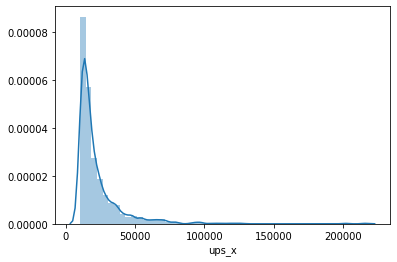

In [33]:
x = merged_df['ups_x']
sns.distplot(x)

### Visualization Part 2: Score(csv file)

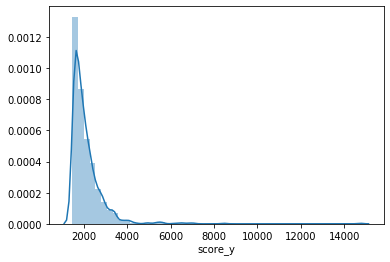

In [34]:
y = merged_df['score_y']
sns.distplot(y)

### Visualization Part 3: Upvotes vs. downvotes from csv file

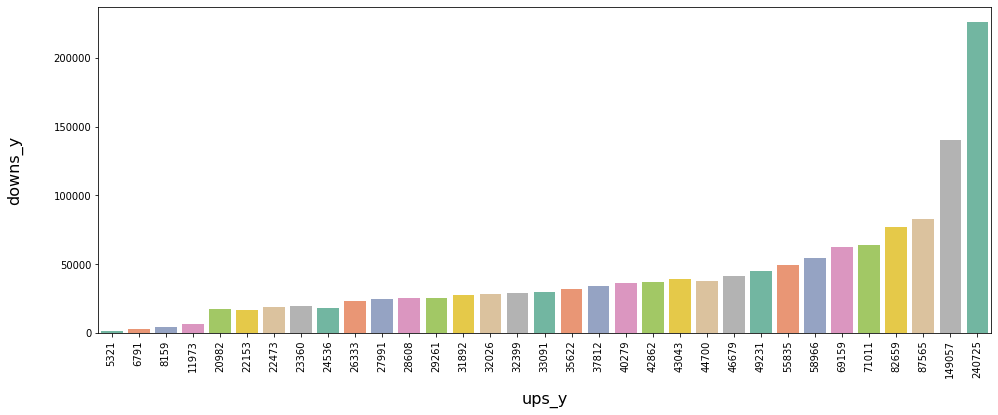

In [36]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x= 'ups_y', y='downs_y', data=merged_df.head(33), palette='Set2')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()


### Visualization Part 4: Downvotes vs. upvotes from API

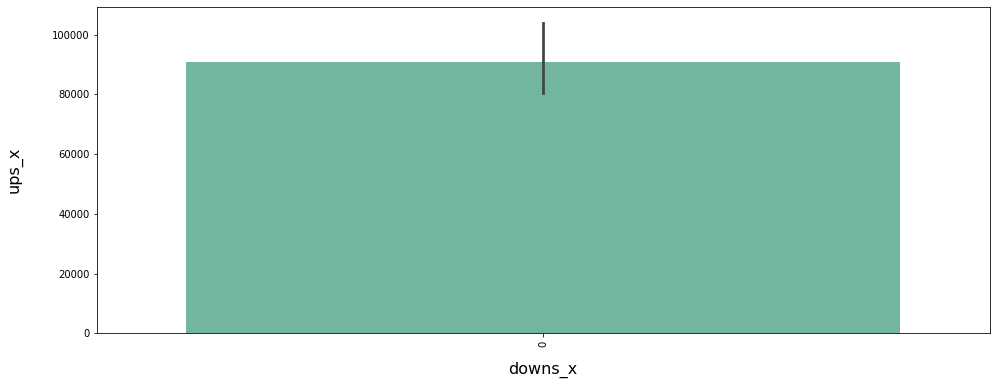

In [38]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x= 'downs_x', y='ups_x', data=merged_df.head(33), palette='Set2')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

### Visualization Part 5: Downvotes(csv file)

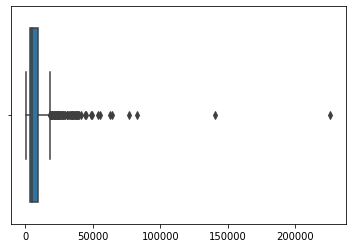

In [63]:
sns.boxplot(np.array(merged_df['downs_y']))
sns.boxplot(np.array(merged_df[''])

In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 997
Data columns (total 25 columns):
pid               998 non-null int32
created_utc_x     998 non-null float64
score_x           998 non-null int64
domain_x          998 non-null object
id_x              998 non-null object
title_x           998 non-null object
ups_x             998 non-null int64
downs_x           998 non-null int64
num_comments_x    998 non-null int64
created_utc_y     998 non-null float64
score_y           998 non-null int64
domain_y          998 non-null object
id_y              998 non-null object
title_y           998 non-null object
ups_y             998 non-null int64
downs_y           998 non-null int64
num_comments_y    998 non-null int64
permalink         998 non-null object
over_18           998 non-null bool
thumbnail         998 non-null object
subreddit_id      998 non-null object
edited            998 non-null object
is_self           998 non-null bool
name              998 non-null o

### Web Scraping

In [82]:
#Importing the required libraries
from bs4 import BeautifulSoup
import requests
url = "https://old.reddit.com/r/IAmA/top/?sort=top&t=all" # The url of the webpage

In [84]:
response = requests.get(url, headers = {'User-Agent': 'Mozilla/5.0'})

response

<Response [200]>

In [85]:
data = response.text

data


'<!doctype html><html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en"><head><title>top scoring links : IAmA</title><meta name="keywords" content=" reddit, reddit.com, vote, comment, submit " /><meta name="description" content="I Am A, where the mundane becomes fascinating and the outrageous suddenly seems normal." /><meta name="referrer" content="always"><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><link type="application/opensearchdescription+xml" rel="search" href="/static/opensearch.xml"/><link rel="canonical" href="https://www.reddit.com/r/IAmA/" /><meta name="viewport" content="width=1024"><link rel="dns-prefetch" href="//out.reddit.com"><link rel="preconnect" href="//out.reddit.com"><meta property="og:image" content="https://a.thumbs.redditmedia.com/m-Xgu-LJbK3Yh-QVw1YQliaH7oa90SIMzDWOCQe6xj4.png"><meta property="og:site_name" content="reddit"><meta property="og:description" content="I Am A, where the mundane becomes fascinating and the outrag

In [86]:
soup = BeautifulSoup(data, 'html.parser')

soup

<!DOCTYPE html>
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><title>top scoring links : IAmA</title><meta content=" reddit, reddit.com, vote, comment, submit " name="keywords"/><meta content="I Am A, where the mundane becomes fascinating and the outrageous suddenly seems normal." name="description"/><meta content="always" name="referrer"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"><link href="/static/opensearch.xml" rel="search" type="application/opensearchdescription+xml"/><link href="https://www.reddit.com/r/IAmA/" rel="canonical"/><meta content="width=1024" name="viewport"/><link href="//out.reddit.com" rel="dns-prefetch"/><link href="//out.reddit.com" rel="preconnect"/><meta content="https://a.thumbs.redditmedia.com/m-Xgu-LJbK3Yh-QVw1YQliaH7oa90SIMzDWOCQe6xj4.png" property="og:image"/><meta content="reddit" property="og:site_name"/><meta content="I Am A, where the mundane becomes fascinating and the outrageous suddenly seems norma

In [87]:
#author names
attrs = {'class': 'thing', 'data-domain': 'self.IAmA'}
for i in soup.find_all("div", attrs = attrs):
    author = i.find("a", class_ = "author").text
    print(author)

PresidentObama
korantano
FPGauravLaroia
StanGibson18
thisisbillgates
thisisbillgates
TheRealLeahRemini
thisisbillgates
bernie-sanders
Tyree07
WKRG_AlanSealls
fallenangel3633
wamandajd
_EdwardSnowden
-Futurama_Official-
bernie-sanders
Me_CookieMonster
_Gordon_Ramsay
fightforthefuture
janegoodall_official
fearless1927
Ihaveanotheridentity
AndrewyangUBI
colinwarner


In [89]:
author = i.find("a", class_ = "author")
author

<a class="author may-blank id-t2_ag3x1ww" href="https://old.reddit.com/user/colinwarner">colinwarner</a>

In [ ]:
original_poster = i.find('a',attrs={'class':'author'}).text

In [95]:
original_poster

'colinwarner'

In [97]:
#titles
attrs = {'class': 'thing', 'data-domain': 'self.IAmA'}
for i in soup.find_all("div", attrs = attrs):
    title = i.find("p", class_ = "title").text
    print(title)

I am Barack Obama, President of the United States -- AMA (self.IAmA)
[AMA Request] Victoria, ex-AMA mod (self.IAmA)
NonprofitFCC just voted to kill Net Neutrality. Now we will SUE THEM and FIGHT in Congress! We are Free Press & friends. AMA (self.IAmA)
PoliticsI’m American citizen, undecided voter, loving husband Ken Bone, Welcome to the Bone Zone! AMA (self.IAmA)
NonprofitI’m Bill Gates, co-chair of the Bill & Melinda Gates Foundation. Ask Me Anything. (self.IAmA)
NonprofitI’m Bill Gates, co-chair of the Bill & Melinda Gates Foundation. Ask Me Anything. (self.IAmA)
Actor / EntertainerI am Leah Remini, Ask Me Anything about Scientology (self.IAmA)
NonprofitI’m Bill Gates, co-chair of the Bill & Melinda Gates Foundation. Ask Me Anything. (self.IAmA)
PoliticsI am Senator Bernie Sanders. Ask Me Anything! (self.IAmA)
CrosspostJoe Manchin refused to listen to our pleas for help. He said, “I’m not changing. Find somebody else who can beat me and vote me out.“ So, I took him up on it. I’m run

In [101]:
print(merged_df['title_x'][0:10])

0    I am Barack Obama, President of the United Sta...
1           Protect Net Neutrality. Save the Internet.
2                   [AMA Request] Victoria, ex-AMA mod
3    FCC just voted to kill Net Neutrality. Now we ...
4    I’m American citizen, undecided voter, loving ...
5    I’m Bill Gates, co-chair of the Bill & Melinda...
6    I’m Bill Gates, co-chair of the Bill & Melinda...
7    I am Leah Remini, Ask Me Anything about Scient...
8    I’m Bill Gates, co-chair of the Bill & Melinda...
9        I am Senator Bernie Sanders. Ask Me Anything!
Name: title_x, dtype: object


In [108]:
merged_df = pd.merge(ama_df,revised_df,left_on='pid',right_on='pid')                            
merged_df

,pid,created_utc_x,score_x,domain_x,id_x,title_x,ups_x,downs_x,num_comments_x,primaryid,...,downs_y,num_comments_y,permalink,over_18,thumbnail,subreddit_id,edited,is_self,name,url
0,0,1.346270e+09,216145,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",216145,0,23136,0,...,225976,24185,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,False,self,t5_2qzb6,1346276503.0,True,t3_z1c9z,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...
1,1,1.511329e+09,201643,battleforthenet.com,7eojwf,Protect Net Neutrality. Save the Internet.,201643,0,2743,1,...,140610,28062,http://www.reddit.com/r/IAmA/comments/18bhme/i...,False,self,t5_2qzb6,1360612188.0,True,t3_18bhme,http://www.reddit.com/r/IAmA/comments/18bhme/i...
2,2,1.435945e+09,126766,self.IAmA,3c0iw2,"[AMA Request] Victoria, ex-AMA mod",126766,0,2814,2,...,37659,10850,http://www.reddit.com/r/IAmA/comments/mateq/i_...,False,self,t5_2qzb6,False,True,t3_mateq,http://www.reddit.com/r/IAmA/comments/mateq/i_...
3,3,1.513275e+09,121803,self.IAmA,7jtes4,FCC just voted to kill Net Neutrality. Now we ...,121803,0,2645,3,...,64145,11895,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,False,self,t5_2qzb6,False,True,t3_x9pq0,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...
4,4,1.476408e+09,116902,self.IAmA,57dw9a,"I’m American citizen, undecided voter, loving ...",116902,0,16891,4,...,17964,5337,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,False,self,t5_2qzb6,1371360207.0,True,t3_1byn1l,http://www.reddit.com/r/IAmA/comments/1byn1l/i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,993,1.445994e+09,10108,self.IAmA,3qhzg6,"I am Steve-O, jackass, entertainer, I'm taping...",10108,0,4117,993,...,17328,5337,http://www.reddit.com/r/IAmA/comments/1dcr3j/i...,False,self,t5_2qzb6,1367284514.0,True,t3_1dcr3j,http://www.reddit.com/r/IAmA/comments/1dcr3j/i...
994,994,1.510945e+09,10101,self.IAmA,7dn2vd,"We are Chromeo, back after 3 years and funkier...",10101,0,629,994,...,887,788,http://www.reddit.com/r/IAmA/comments/14brnr/i...,False,self,t5_2qzb6,1354740228.0,True,t3_14brnr,http://www.reddit.com/r/IAmA/comments/14brnr/i...
995,995,1.568903e+09,10101,self.IAmA,d6etv5,"Hi. I'm Beto O'Rourke, a candidate for President.",10101,0,27088,995,...,1405,494,http://www.reddit.com/r/IAmA/comments/1dz11f/i...,False,self,t5_2qzb6,1368063400.0,True,t3_1dz11f,http://www.reddit.com/r/IAmA/comments/1dz11f/i...
996,996,1.559823e+09,10092,self.IAmA,bxg0ll,"I'm Marisa, a scientist studying the cross-tal...",10092,0,1151,996,...,4483,2076,http://www.reddit.com/r/IAmA/comments/1dg3ak/r...,False,self,t5_2qzb6,False,True,t3_1dg3ak,http://www.reddit.com/r/IAmA/comments/1dg3ak/r...


In [151]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 997
Data columns (total 26 columns):
pid               998 non-null int32
created_utc_x     998 non-null float64
score_x           998 non-null int64
domain_x          998 non-null object
id_x              998 non-null object
title_x           998 non-null object
ups_x             998 non-null int64
downs_x           998 non-null int64
num_comments_x    998 non-null int64
primaryid         998 non-null int32
created_utc_y     998 non-null float64
score_y           998 non-null int64
domain_y          998 non-null object
id_y              998 non-null object
title_y           998 non-null object
ups_y             998 non-null int64
downs_y           998 non-null int64
num_comments_y    998 non-null int64
permalink         998 non-null object
over_18           998 non-null bool
thumbnail         998 non-null object
subreddit_id      998 non-null object
edited            998 non-null object
is_self           998 non-null 

In [152]:
merged_df.drop(['ups_x', 'downs_x', 'num_comments_x', 'ups_y', 'downs_y', 'thumbnail', 'name', 'score_y', 'created_utc_y'], axis = 1)

,pid,created_utc_x,score_x,domain_x,id_x,title_x,primaryid,domain_y,id_y,title_y,num_comments_y,permalink,over_18,subreddit_id,edited,is_self,url
0,0,1.346270e+09,216145,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",0,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",24185,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,False,t5_2qzb6,1346276503.0,True,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...
1,1,1.511329e+09,201643,battleforthenet.com,7eojwf,Protect Net Neutrality. Save the Internet.,1,self.IAmA,18bhme,"I’m Bill Gates, co-chair of the Bill &amp; Mel...",28062,http://www.reddit.com/r/IAmA/comments/18bhme/i...,False,t5_2qzb6,1360612188.0,True,http://www.reddit.com/r/IAmA/comments/18bhme/i...
2,2,1.435945e+09,126766,self.IAmA,3c0iw2,"[AMA Request] Victoria, ex-AMA mod",2,self.IAmA,mateq,I am Neil deGrasse Tyson -- AMA,10850,http://www.reddit.com/r/IAmA/comments/mateq/i_...,False,t5_2qzb6,False,True,http://www.reddit.com/r/IAmA/comments/mateq/i_...
3,3,1.513275e+09,121803,self.IAmA,7jtes4,FCC just voted to kill Net Neutrality. Now we ...,3,self.IAmA,x9pq0,"IAM Bill Nye the Science Guy, AMA",11895,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,False,t5_2qzb6,False,True,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...
4,4,1.476408e+09,116902,self.IAmA,57dw9a,"I’m American citizen, undecided voter, loving ...",4,self.IAmA,1byn1l,"I was mauled by a bear, fought it off, and dro...",5337,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,False,t5_2qzb6,1371360207.0,True,http://www.reddit.com/r/IAmA/comments/1byn1l/i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,993,1.445994e+09,10108,self.IAmA,3qhzg6,"I am Steve-O, jackass, entertainer, I'm taping...",993,self.IAmA,1dcr3j,I am a comedian named Bo Burnham. AMA,5337,http://www.reddit.com/r/IAmA/comments/1dcr3j/i...,False,t5_2qzb6,1367284514.0,True,http://www.reddit.com/r/IAmA/comments/1dcr3j/i...
994,994,1.510945e+09,10101,self.IAmA,7dn2vd,"We are Chromeo, back after 3 years and funkier...",994,self.IAmA,14brnr,IAmA Washington bureau chief of The New York T...,788,http://www.reddit.com/r/IAmA/comments/14brnr/i...,False,t5_2qzb6,1354740228.0,True,http://www.reddit.com/r/IAmA/comments/14brnr/i...
995,995,1.568903e+09,10101,self.IAmA,d6etv5,"Hi. I'm Beto O'Rourke, a candidate for President.",995,self.IAmA,1dz11f,"I am Christine Ha, MasterChef Season 3 Winner....",494,http://www.reddit.com/r/IAmA/comments/1dz11f/i...,False,t5_2qzb6,1368063400.0,True,http://www.reddit.com/r/IAmA/comments/1dz11f/i...
996,996,1.559823e+09,10092,self.IAmA,bxg0ll,"I'm Marisa, a scientist studying the cross-tal...",996,self.IAmA,1dg3ak,"Reddit w/ Gov. Gary Johnson, Honorary Chairman...",2076,http://www.reddit.com/r/IAmA/comments/1dg3ak/r...,False,t5_2qzb6,False,True,http://www.reddit.com/r/IAmA/comments/1dg3ak/r...


In [113]:
import requests
import csv
from bs4 import BeautifulSoup

url = "https://old.reddit.com/r/IAmA/top/?sort=top&t=all"   #The url of webpage
    
response = requests.get(url, headers = {'User-Agent': 'Mozilla/5.0'}) #Checking the response of the page

soup = BeautifulSoup(response.text, 'html.parser') #parser

counter = 0 #setting a counter for page iteration
while counter <= 1000:
    for post in soup.find_all("div", attrs = {'class': 'thing', 'data-domain': 'self.IAmA'}):
        title = post.find("p", class_="title").text
        print(counter)
        print(title)
        forward_link = post.find("a", class_="title").attrs["href"]
        print(forward_link)
            
        try:
            author = post.find("a", class_="author").text
        except:
            author = "[deleted]"
            
        print(author)
        likes = post.find("div", attrs={"class": "score unvoted"}).text
        print(likes)
        post_line = [counter, title, author, likes, forward_link]
        #Saving the data in a csv file
        with open('Web_scraping_data2.csv', 'a', encoding = "utf-8") as f:
            writer = csv.writer(f)

            writer.writerow(post_line)
            
            counter += 1
    #finding the next page link    
    next_button = soup.find("span", class_="next-button")
    next_page_link = next_button.find("a").attrs['href']
    page = requests.get(next_page_link, headers = {'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(page.text, 'html.parser')

0
I am Barack Obama, President of the United States -- AMA (self.IAmA)
/r/IAmA/comments/z1c9z/i_am_barack_obama_president_of_the_united_states/
PresidentObama
216k
1
[AMA Request] Victoria, ex-AMA mod (self.IAmA)
/r/IAmA/comments/3c0iw2/ama_request_victoria_exama_mod/
korantano
127k
2
NonprofitFCC just voted to kill Net Neutrality. Now we will SUE THEM and FIGHT in Congress! We are Free Press & friends. AMA (self.IAmA)
/r/IAmA/comments/7jtes4/fcc_just_voted_to_kill_net_neutrality_now_we_will/
FPGauravLaroia
122k
3
PoliticsI’m American citizen, undecided voter, loving husband Ken Bone, Welcome to the Bone Zone! AMA (self.IAmA)
/r/IAmA/comments/57dw9a/im_american_citizen_undecided_voter_loving/
StanGibson18
117k
4
NonprofitI’m Bill Gates, co-chair of the Bill & Melinda Gates Foundation. Ask Me Anything. (self.IAmA)
/r/IAmA/comments/aunv58/im_bill_gates_cochair_of_the_bill_melinda_gates/
thisisbillgates
110k
5
NonprofitI’m Bill Gates, co-chair of the Bill & Melinda Gates Foundation. Ask M

AttributeError: 'NoneType' object has no attribute 'find'

In [40]:
ws = pd.read_csv('C:/Users/paini/OneDrive/Desktop/dmdd/Web_scraping_data2.csv')

In [41]:
ws.head()

,pid,title,author_name,score,url
0,0.0,"I am Barack Obama, President of the United Sta...",PresidentObama,216k,/r/IAmA/comments/z1c9z/i_am_barack_obama_presi...
1,NaN,NaN,NaN,NaN,NaN
2,1.0,"[AMA Request] Victoria, ex-AMA mod (self.IAmA)",korantano,127k,/r/IAmA/comments/3c0iw2/ama_request_victoria_e...
3,NaN,NaN,NaN,NaN,NaN
4,2.0,NonprofitFCC just voted to kill Net Neutrality...,FPGauravLaroia,122k,/r/IAmA/comments/7jtes4/fcc_just_voted_to_kill...


In [42]:
import numpy as np

In [43]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 5 columns):
pid            961 non-null float64
title          961 non-null object
author_name    961 non-null object
score          961 non-null object
url            961 non-null object
dtypes: float64(1), object(4)
memory usage: 75.2+ KB


In [44]:
ws.isna()

,pid,title,author_name,score,url
0,False,False,False,False,False
1,True,True,True,True,True
2,False,False,False,False,False
3,True,True,True,True,True
4,False,False,False,False,False
...,...,...,...,...,...
1916,False,False,False,False,False
1917,True,True,True,True,True
1918,False,False,False,False,False
1919,True,True,True,True,True


In [45]:
ws = ws.dropna()
ws.head()
ws.tail()

,pid,title,author_name,score,url
1912,956.0,"PoliticsHi. I'm Beto O'Rourke, a candidate for...",betoorourke,10.1k,/r/IAmA/comments/d6etv5/hi_im_beto_orourke_a_c...
1914,957.0,"ScienceIAM Nichelle Nichols, Star Trek's ""Uhur...",NichelleNichols,10.1k,/r/IAmA/comments/3nv64y/iam_nichelle_nichols_s...
1916,958.0,"Actor / EntertainerI am Steve-O, jackass, ente...",officiallysteveo,10.1k,/r/IAmA/comments/3qhzg6/i_am_steveo_jackass_en...
1918,959.0,"MusicWe are Chromeo, back after 3 years and fu...",chromeo,10.1k,/r/IAmA/comments/7dn2vd/we_are_chromeo_back_af...
1920,960.0,"ScienceI'm Marisa, a scientist studying the cr...",Immunity-and-beyond,10.1k,/r/IAmA/comments/bxg0ll/im_marisa_a_scientist_...


In [46]:
ws['pid'] = ws['pid'].apply(np.int64)
ws.head()

,pid,title,author_name,score,url
0,0,"I am Barack Obama, President of the United Sta...",PresidentObama,216k,/r/IAmA/comments/z1c9z/i_am_barack_obama_presi...
2,1,"[AMA Request] Victoria, ex-AMA mod (self.IAmA)",korantano,127k,/r/IAmA/comments/3c0iw2/ama_request_victoria_e...
4,2,NonprofitFCC just voted to kill Net Neutrality...,FPGauravLaroia,122k,/r/IAmA/comments/7jtes4/fcc_just_voted_to_kill...
6,3,"PoliticsI’m American citizen, undecided voter,...",StanGibson18,117k,/r/IAmA/comments/57dw9a/im_american_citizen_un...
8,4,"NonprofitI’m Bill Gates, co-chair of the Bill ...",thisisbillgates,110k,/r/IAmA/comments/aunv58/im_bill_gates_cochair_...


In [47]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 1920
Data columns (total 5 columns):
pid            961 non-null int64
title          961 non-null object
author_name    961 non-null object
score          961 non-null object
url            961 non-null object
dtypes: int64(1), object(4)
memory usage: 45.0+ KB


In [48]:
ws.isna()

,pid,title,author_name,score,url
0,False,False,False,False,False
2,False,False,False,False,False
4,False,False,False,False,False
6,False,False,False,False,False
8,False,False,False,False,False
...,...,...,...,...,...
1912,False,False,False,False,False
1914,False,False,False,False,False
1916,False,False,False,False,False
1918,False,False,False,False,False


In [49]:
ws['pid'] = ws['pid'].apply(np.int64)
ws.head()

,pid,title,author_name,score,url
0,0,"I am Barack Obama, President of the United Sta...",PresidentObama,216k,/r/IAmA/comments/z1c9z/i_am_barack_obama_presi...
2,1,"[AMA Request] Victoria, ex-AMA mod (self.IAmA)",korantano,127k,/r/IAmA/comments/3c0iw2/ama_request_victoria_e...
4,2,NonprofitFCC just voted to kill Net Neutrality...,FPGauravLaroia,122k,/r/IAmA/comments/7jtes4/fcc_just_voted_to_kill...
6,3,"PoliticsI’m American citizen, undecided voter,...",StanGibson18,117k,/r/IAmA/comments/57dw9a/im_american_citizen_un...
8,4,"NonprofitI’m Bill Gates, co-chair of the Bill ...",thisisbillgates,110k,/r/IAmA/comments/aunv58/im_bill_gates_cochair_...


In [50]:
ws.reset_index(drop = True)

,pid,title,author_name,score,url
0,0,"I am Barack Obama, President of the United Sta...",PresidentObama,216k,/r/IAmA/comments/z1c9z/i_am_barack_obama_presi...
1,1,"[AMA Request] Victoria, ex-AMA mod (self.IAmA)",korantano,127k,/r/IAmA/comments/3c0iw2/ama_request_victoria_e...
2,2,NonprofitFCC just voted to kill Net Neutrality...,FPGauravLaroia,122k,/r/IAmA/comments/7jtes4/fcc_just_voted_to_kill...
3,3,"PoliticsI’m American citizen, undecided voter,...",StanGibson18,117k,/r/IAmA/comments/57dw9a/im_american_citizen_un...
4,4,"NonprofitI’m Bill Gates, co-chair of the Bill ...",thisisbillgates,110k,/r/IAmA/comments/aunv58/im_bill_gates_cochair_...
...,...,...,...,...,...
956,956,"PoliticsHi. I'm Beto O'Rourke, a candidate for...",betoorourke,10.1k,/r/IAmA/comments/d6etv5/hi_im_beto_orourke_a_c...
957,957,"ScienceIAM Nichelle Nichols, Star Trek's ""Uhur...",NichelleNichols,10.1k,/r/IAmA/comments/3nv64y/iam_nichelle_nichols_s...
958,958,"Actor / EntertainerI am Steve-O, jackass, ente...",officiallysteveo,10.1k,/r/IAmA/comments/3qhzg6/i_am_steveo_jackass_en...
959,959,"MusicWe are Chromeo, back after 3 years and fu...",chromeo,10.1k,/r/IAmA/comments/7dn2vd/we_are_chromeo_back_af...


In [51]:
ws.head()

,pid,title,author_name,score,url
0,0,"I am Barack Obama, President of the United Sta...",PresidentObama,216k,/r/IAmA/comments/z1c9z/i_am_barack_obama_presi...
2,1,"[AMA Request] Victoria, ex-AMA mod (self.IAmA)",korantano,127k,/r/IAmA/comments/3c0iw2/ama_request_victoria_e...
4,2,NonprofitFCC just voted to kill Net Neutrality...,FPGauravLaroia,122k,/r/IAmA/comments/7jtes4/fcc_just_voted_to_kill...
6,3,"PoliticsI’m American citizen, undecided voter,...",StanGibson18,117k,/r/IAmA/comments/57dw9a/im_american_citizen_un...
8,4,"NonprofitI’m Bill Gates, co-chair of the Bill ...",thisisbillgates,110k,/r/IAmA/comments/aunv58/im_bill_gates_cochair_...


In [52]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 1920
Data columns (total 5 columns):
pid            961 non-null int64
title          961 non-null object
author_name    961 non-null object
score          961 non-null object
url            961 non-null object
dtypes: int64(1), object(4)
memory usage: 45.0+ KB


In [53]:
ws[['pid', 'author_name']]

,pid,author_name
0,0,PresidentObama
2,1,korantano
4,2,FPGauravLaroia
6,3,StanGibson18
8,4,thisisbillgates
...,...,...
1912,956,betoorourke
1914,957,NichelleNichols
1916,958,officiallysteveo
1918,959,chromeo


In [54]:
sc_df = ws[['pid', 'author_name']]

In [55]:
sc_df


,pid,author_name
0,0,PresidentObama
2,1,korantano
4,2,FPGauravLaroia
6,3,StanGibson18
8,4,thisisbillgates
...,...,...
1912,956,betoorourke
1914,957,NichelleNichols
1916,958,officiallysteveo
1918,959,chromeo


### Merging into final dataframe consisting of API and csv in "merged_df" and scraped data in "sc_df"

In [56]:
final_df = pd.merge(merged_df,sc_df,left_on='pid',right_on='pid')   
final_df.head()

,pid,created_utc_x,score_x,domain_x,id_x,title_x,ups_x,downs_x,num_comments_x,created_utc_y,...,num_comments_y,permalink,over_18,thumbnail,subreddit_id,edited,is_self,name,url,author_name
0,0,1.346270e+09,216142,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",216142,0,23135,1.346270e+09,...,24185,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,False,self,t5_2qzb6,1346276503.0,True,t3_z1c9z,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,PresidentObama
1,1,1.511329e+09,201649,battleforthenet.com,7eojwf,Protect Net Neutrality. Save the Internet.,201649,0,2743,1.360604e+09,...,28062,http://www.reddit.com/r/IAmA/comments/18bhme/i...,False,self,t5_2qzb6,1360612188.0,True,t3_18bhme,http://www.reddit.com/r/IAmA/comments/18bhme/i...,korantano
2,2,1.435945e+09,126769,self.IAmA,3c0iw2,"[AMA Request] Victoria, ex-AMA mod",126769,0,2814,1.321204e+09,...,10850,http://www.reddit.com/r/IAmA/comments/mateq/i_...,False,self,t5_2qzb6,False,True,t3_mateq,http://www.reddit.com/r/IAmA/comments/mateq/i_...,FPGauravLaroia
3,3,1.513275e+09,121802,self.IAmA,7jtes4,FCC just voted to kill Net Neutrality. Now we ...,121802,0,2645,1.343426e+09,...,11895,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,False,self,t5_2qzb6,False,True,t3_x9pq0,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,StanGibson18
4,4,1.476408e+09,116912,self.IAmA,57dw9a,"I’m American citizen, undecided voter, loving ...",116912,0,16891,1.365473e+09,...,5337,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,False,self,t5_2qzb6,1371360207.0,True,t3_1byn1l,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,thisisbillgates


### Entities in final dataframe with no null values

In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 960
Data columns (total 26 columns):
pid               961 non-null int32
created_utc_x     961 non-null float64
score_x           961 non-null int64
domain_x          961 non-null object
id_x              961 non-null object
title_x           961 non-null object
ups_x             961 non-null int64
downs_x           961 non-null int64
num_comments_x    961 non-null int64
created_utc_y     961 non-null float64
score_y           961 non-null int64
domain_y          961 non-null object
id_y              961 non-null object
title_y           961 non-null object
ups_y             961 non-null int64
downs_y           961 non-null int64
num_comments_y    961 non-null int64
permalink         961 non-null object
over_18           961 non-null bool
thumbnail         961 non-null object
subreddit_id      961 non-null object
edited            961 non-null object
is_self           961 non-null bool
name              961 non-null o

### Dropping repetitive columns

In [59]:
final_df = final_df.drop(['ups_x', 'downs_x', 'num_comments_x', 'ups_y', 'downs_y', 'thumbnail', 'name', 'score_y', 'created_utc_y', 'title_y', 'id_y', 'domain_y'], axis = 1)

In [166]:
final_df.head()

,pid,created_utc_x,score_x,domain_x,id_x,title_x,num_comments_y,permalink,over_18,subreddit_id,edited,is_self,url,author_name
0,0,1.346270e+09,216145,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",24185,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,False,t5_2qzb6,1346276503.0,True,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,PresidentObama
1,1,1.511329e+09,201643,battleforthenet.com,7eojwf,Protect Net Neutrality. Save the Internet.,28062,http://www.reddit.com/r/IAmA/comments/18bhme/i...,False,t5_2qzb6,1360612188.0,True,http://www.reddit.com/r/IAmA/comments/18bhme/i...,korantano
2,2,1.435945e+09,126766,self.IAmA,3c0iw2,"[AMA Request] Victoria, ex-AMA mod",10850,http://www.reddit.com/r/IAmA/comments/mateq/i_...,False,t5_2qzb6,False,True,http://www.reddit.com/r/IAmA/comments/mateq/i_...,FPGauravLaroia
3,3,1.513275e+09,121803,self.IAmA,7jtes4,FCC just voted to kill Net Neutrality. Now we ...,11895,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,False,t5_2qzb6,False,True,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,StanGibson18
4,4,1.476408e+09,116902,self.IAmA,57dw9a,"I’m American citizen, undecided voter, loving ...",5337,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,False,t5_2qzb6,1371360207.0,True,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,thisisbillgates


### Converting the final dataframe to csv file

In [60]:
final_csv = final_df.to_csv(r'C:\Users\paini\OneDrive\Desktop\dmdd\final_df.csv')
final_csv

In [167]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 960
Data columns (total 14 columns):
pid               961 non-null int32
created_utc_x     961 non-null float64
score_x           961 non-null int64
domain_x          961 non-null object
id_x              961 non-null object
title_x           961 non-null object
num_comments_y    961 non-null int64
permalink         961 non-null object
over_18           961 non-null bool
subreddit_id      961 non-null object
edited            961 non-null object
is_self           961 non-null bool
url               961 non-null object
author_name       961 non-null object
dtypes: bool(2), float64(1), int32(1), int64(2), object(8)
memory usage: 95.7+ KB


### Visualization Part 6: Score range of Top 24 scorers

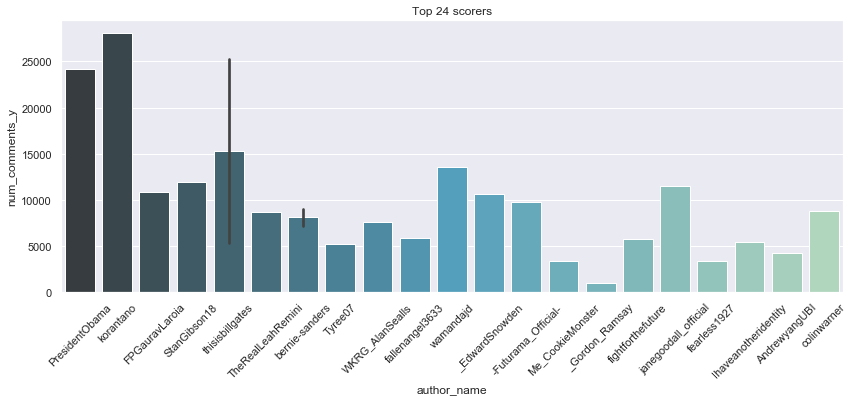

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


sns.set(rc={'figure.figsize':(14,5)})
ax = sns.barplot(y=final_df['num_comments_y'], x=final_df['author_name'][:24], data=final_df, 
                 palette="GnBu_d").set_title('Top 24 scorers');
plt.xticks(rotation=45);

### Visualization Part 7: Range of comments for top 12 posts

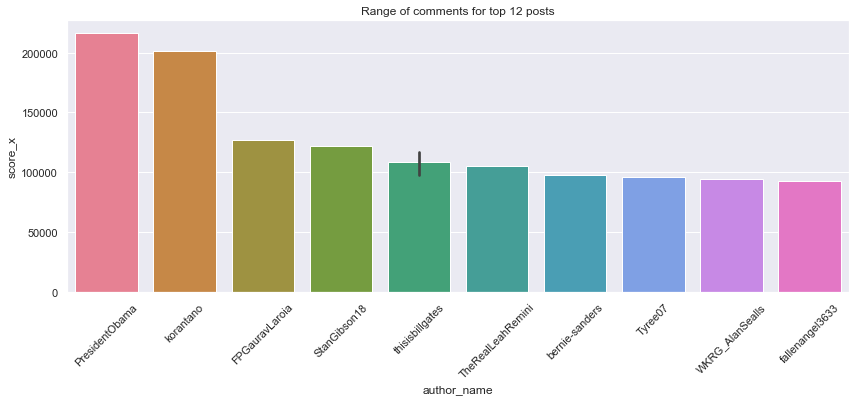

In [176]:
sns.set(rc={'figure.figsize':(14,5)})
ax = sns.barplot(y=final_df['score_x'], x=final_df['author_name'][:12], data=final_df, 
                 palette="husl").set_title('Range of comments for top 12 posts');
plt.xticks(rotation=45);

### Conceptual Database Model

In [66]:
# Dataset with Author names 
Authors = final_df[['pid', 'author_name']]
Authors.head()

,pid,author_name
0,0,PresidentObama
1,1,korantano
2,2,FPGauravLaroia
3,3,StanGibson18
4,4,thisisbillgates


In [68]:
# Dataset with Subreddit Id
Subreddit = final_df[['pid', 'subreddit_id']]
Subreddit.head()

,pid,subreddit_id
0,0,t5_2qzb6
1,1,t5_2qzb6
2,2,t5_2qzb6
3,3,t5_2qzb6
4,4,t5_2qzb6


In [70]:
# Dataset with Post related information
Top_Post = final_df[['pid', 'created_utc_x', 'score_x', 'domain_x', 'id_x', 'title_x',
                     'num_comments_y', 'permalink', 'over_18', 'edited', 'subreddit_id', 'is_self', 'url']]
Top_Post.head()

,pid,created_utc_x,score_x,domain_x,id_x,title_x,num_comments_y,permalink,over_18,edited,subreddit_id,is_self,url
0,0,1.346270e+09,216142,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",24185,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,False,1346276503.0,t5_2qzb6,True,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...
1,1,1.511329e+09,201649,battleforthenet.com,7eojwf,Protect Net Neutrality. Save the Internet.,28062,http://www.reddit.com/r/IAmA/comments/18bhme/i...,False,1360612188.0,t5_2qzb6,True,http://www.reddit.com/r/IAmA/comments/18bhme/i...
2,2,1.435945e+09,126769,self.IAmA,3c0iw2,"[AMA Request] Victoria, ex-AMA mod",10850,http://www.reddit.com/r/IAmA/comments/mateq/i_...,False,False,t5_2qzb6,True,http://www.reddit.com/r/IAmA/comments/mateq/i_...
3,3,1.513275e+09,121802,self.IAmA,7jtes4,FCC just voted to kill Net Neutrality. Now we ...,11895,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,False,False,t5_2qzb6,True,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...
4,4,1.476408e+09,116912,self.IAmA,57dw9a,"I’m American citizen, undecided voter, loving ...",5337,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,False,1371360207.0,t5_2qzb6,True,http://www.reddit.com/r/IAmA/comments/1byn1l/i...


In [69]:
# Final merged dataset
final_df.head()

,pid,created_utc_x,score_x,domain_x,id_x,title_x,num_comments_y,permalink,over_18,subreddit_id,edited,is_self,url,author_name
0,0,1.346270e+09,216142,self.IAmA,z1c9z,"I am Barack Obama, President of the United Sta...",24185,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,False,t5_2qzb6,1346276503.0,True,http://www.reddit.com/r/IAmA/comments/z1c9z/i_...,PresidentObama
1,1,1.511329e+09,201649,battleforthenet.com,7eojwf,Protect Net Neutrality. Save the Internet.,28062,http://www.reddit.com/r/IAmA/comments/18bhme/i...,False,t5_2qzb6,1360612188.0,True,http://www.reddit.com/r/IAmA/comments/18bhme/i...,korantano
2,2,1.435945e+09,126769,self.IAmA,3c0iw2,"[AMA Request] Victoria, ex-AMA mod",10850,http://www.reddit.com/r/IAmA/comments/mateq/i_...,False,t5_2qzb6,False,True,http://www.reddit.com/r/IAmA/comments/mateq/i_...,FPGauravLaroia
3,3,1.513275e+09,121802,self.IAmA,7jtes4,FCC just voted to kill Net Neutrality. Now we ...,11895,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,False,t5_2qzb6,False,True,http://www.reddit.com/r/IAmA/comments/x9pq0/ia...,StanGibson18
4,4,1.476408e+09,116912,self.IAmA,57dw9a,"I’m American citizen, undecided voter, loving ...",5337,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,False,t5_2qzb6,1371360207.0,True,http://www.reddit.com/r/IAmA/comments/1byn1l/i...,thisisbillgates


### ER DAIGRAM

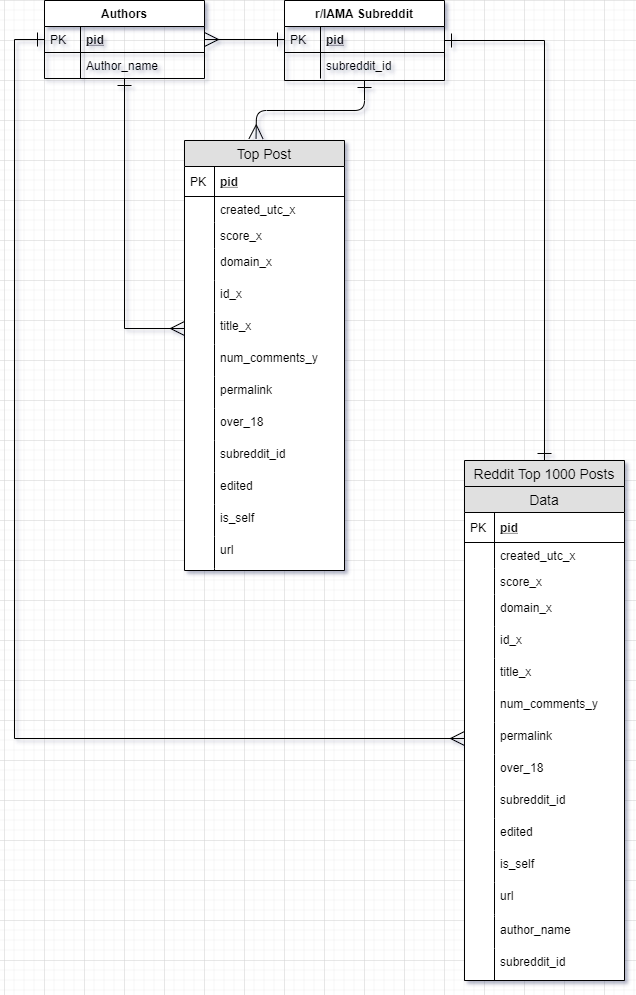

In [181]:
from IPython.display import Image
Image("C:/Users/paini/Downloads/ER.png")

### REPORT

### CONCLUSION
Primary focus of this assignment is to learn how to get the data from different sources, cleaning of data, checking null values present in the data, data munging and to reformat the data to fit a conceptual database model.

### Contribution

### CITATIONS

### LICENSE

Copyright 2019 NIKITA PAI & ABHILASH HEMARAJ

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.